In [1]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bbpgd_data = load_all_files(
    f"../data/logs/data", "bbpgdtrace")

In [3]:
bbpgd_data = bbpgd_data[bbpgd_data["iteration"] != 163]

In [4]:
bbpgd_data

,iteration,step,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
1635,1,1,0.060013,16.6188,-848.114,4115.05,169.6780,3436.610,NaN,NaN,NaN,0
2316,2,2,0.057144,299.1260,-856.549,4106.56,169.6720,3419.680,NaN,NaN,NaN,0
211,3,3,0.050547,768.1580,-877.366,4086.85,169.6590,3379.150,NaN,NaN,NaN,0
2188,4,4,0.048525,320.2990,-885.209,4079.73,169.6530,3364.180,NaN,NaN,NaN,0
673,5,5,0.042654,1023.1100,-909.363,4058.95,169.6330,3319.220,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98,2479,2479,0.001213,9851.2700,-7325.870,6610.24,58.1438,-657.485,NaN,NaN,NaN,0
476,2480,2480,0.001200,191.8660,-7325.930,6610.25,58.1432,-657.530,NaN,NaN,NaN,0
1094,2481,2481,0.001135,1054.0000,-7326.250,6610.36,58.1397,-657.760,NaN,NaN,NaN,0
1264,2482,2482,0.001129,175.5340,-7326.310,6610.38,58.1391,-657.792,NaN,NaN,NaN,0


In [10]:
import seaborn as sns

tolerance = 1e-3


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, lw=2, ms=10, color="purple", palette=("purple",), legend=True, label=y)

    if xscale:
        ax.set_xscale(xscale)
    if yscale:
        ax.set_yscale(yscale)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    # ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

    return fig

/tmp/ipykernel_68606/3941436585.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


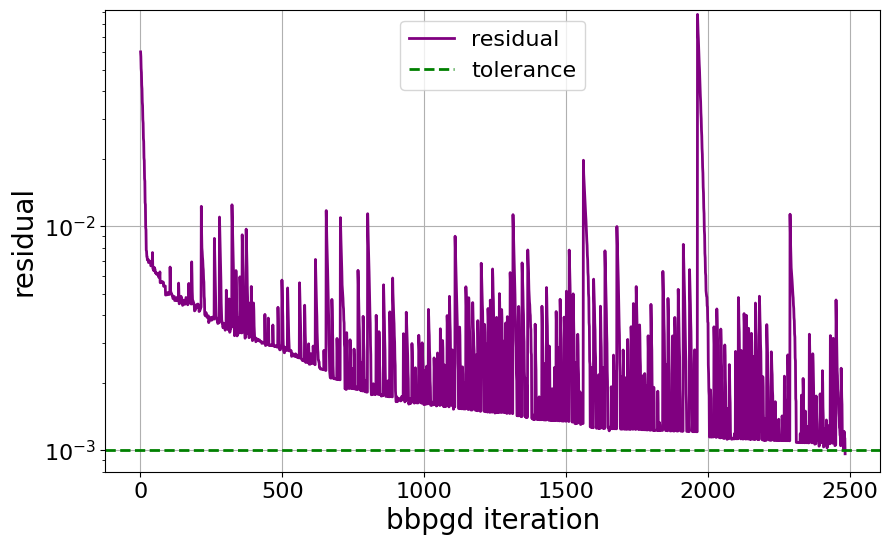

In [11]:
fig = makeplot(bbpgd_data, x='step', y='residual',
               xlabel='bbpgd iteration',

                      ylabel='residual', outname='bbpgd_residual.png')
# fig.axes[0].legend({'Total Energy': 'blue'}, fontsize=16)
fig.axes[0].set_ylim(8e-4, None)
fig.axes[0].set_yscale('log')


fig.axes[0].axhline(y=tolerance, color='green', linestyle='--',
                    label='tolerance', linewidth=2)


fig.axes[0].legend(fontsize=16, loc='upper center')
fig.savefig('bbpgd_residual.png', dpi=300, bbox_inches="tight")

In [7]:
bbpgd_data

,iteration,step,residual,step_size,linear,quadratic,growth,total,x,y,z,rank
1635,1,1,0.060013,16.6188,-848.114,4115.05,169.6780,3436.610,NaN,NaN,NaN,0
2316,2,2,0.057144,299.1260,-856.549,4106.56,169.6720,3419.680,NaN,NaN,NaN,0
211,3,3,0.050547,768.1580,-877.366,4086.85,169.6590,3379.150,NaN,NaN,NaN,0
2188,4,4,0.048525,320.2990,-885.209,4079.73,169.6530,3364.180,NaN,NaN,NaN,0
673,5,5,0.042654,1023.1100,-909.363,4058.95,169.6330,3319.220,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98,2479,2479,0.001213,9851.2700,-7325.870,6610.24,58.1438,-657.485,NaN,NaN,NaN,0
476,2480,2480,0.001200,191.8660,-7325.930,6610.25,58.1432,-657.530,NaN,NaN,NaN,0
1094,2481,2481,0.001135,1054.0000,-7326.250,6610.36,58.1397,-657.760,NaN,NaN,NaN,0
1264,2482,2482,0.001129,175.5340,-7326.310,6610.38,58.1391,-657.792,NaN,NaN,NaN,0


/tmp/ipykernel_68606/2384455314.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


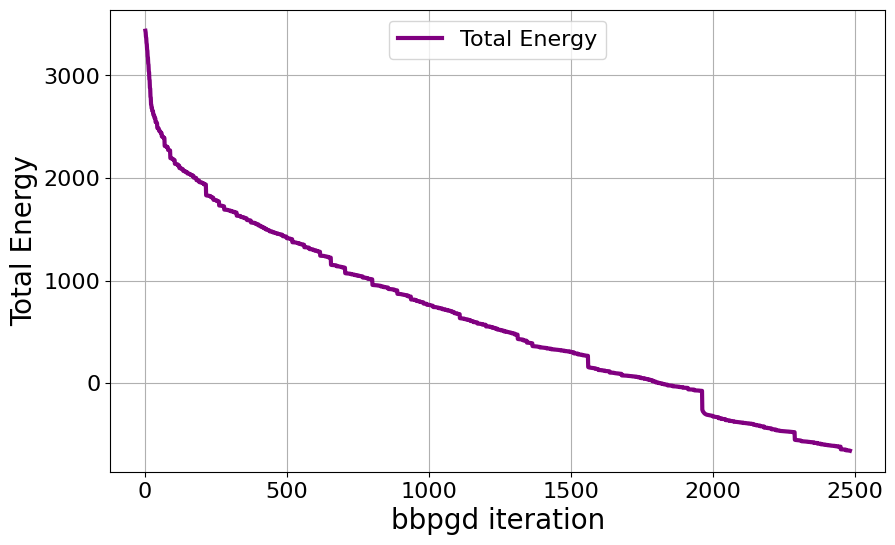

In [8]:
fig = makeplot(bbpgd_data, x='step', y='total',
               xlabel='bbpgd iteration',

                      ylabel='Total Energy', outname='bbpgd_total_energy.png')
fig.axes[0].legend({'Total Energy': 'blue'}, fontsize=16, loc='upper center')


fig.savefig('bbpgd_total_energy.png', dpi=300, bbox_inches="tight")